In [302]:
from sequence import * 
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from scipy import sparse, stats



import sklearn.datasets

### Read in data from class I and class II KARIs 

In [174]:


class_1_c1 = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classI_kari/kari_class_1_swissprot_c1_domains.fasta')

print(len(class_1_c1))

class_2_c1_seqs = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classII_kari/kari_class_2_swissprot_c1_domains.fasta')

#print(len(class_2_c1_seqs))

class_2_c2_seqs = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classII_kari/kari_class_2_swissprot_c2_domains.fasta')

#print(len(class_2_c2_seqs))



527


### Define functions for Kmer counting 

In [199]:
#simple sliding window kmer counter 

def count_kmers(seq, k_len):
    
    kmers = defaultdict(int)
    
    for i in range(len(seq) - k_len + 1):
        kmers[seq[i:i+k_len]] += 1 

    return kmers


#create a dictionary mapping kmer counts to a particular sequence 
def construct_ids(sequences: list, k) -> dict:  
    
    ids = {}
    for seq in sequences:
        ks = count_kmers(seq, k)
        
        ids[seq.name] = ks
        
    return ids

### Save all kmer counts into dictionaries 

In [246]:

class1_ids = construct_ids(class_1_c1, 3)


class2_c1_ids = construct_ids(class_2_c1_seqs, 3)
class2_c2_ids = construct_ids(class_2_c2_seqs, 3)


In [247]:
class_1 = pd.DataFrame.from_dict(class1_ids, orient='index')

class2_c1 = pd.DataFrame.from_dict(class2_c1_ids, orient='index')

class2_c2 = pd.DataFrame.from_dict(class2_c2_ids, orient='index')


### Visualise sparcity of data 

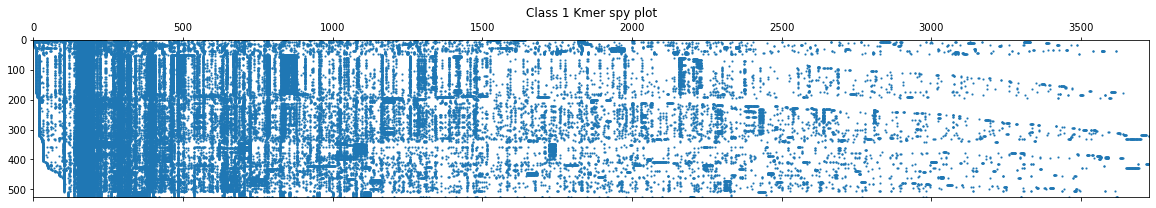

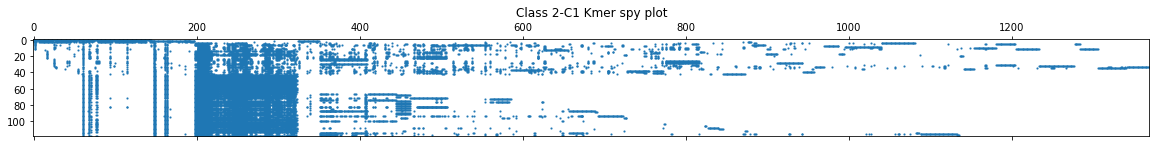

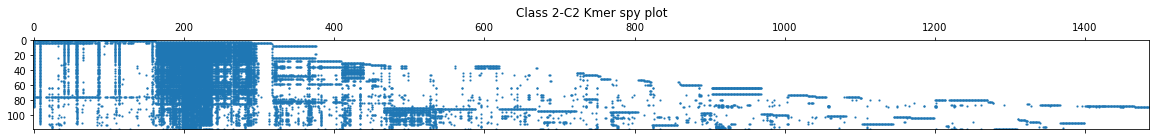

In [248]:
#blue dot = kmer count present 
fig= plt.figure(figsize=(20,20))
plt.title("Class 1 Kmer spy plot")
plt.spy(class_1, markersize=1)

fig2= plt.figure(figsize=(20,20))
plt.title("Class 2-C1 Kmer spy plot")
plt.spy(class2_c1, markersize=1)

fig3= plt.figure(figsize=(20,20))
plt.title("Class 2-C2 Kmer spy plot")
plt.spy(class2_c2, markersize=1)

### Perform normalisation 

Will initally try normalising by Euclidean distance for each sequence so total counts all add to 1. 

Euc_dist = sqrt(x^2 + y^2...) 

#### Class 1

In [249]:
class_1

,TFE,FER,ERE,REV,EVN,VNS,NSD,SDL,DLY,LYG,...,TVH,AVP,VPL,SPV,NRK,RWA,WAA,HLM,MVA,KRY
P06168_class_1_c1_domain,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P38674_class_1_c1_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q64BR7_class_1_c1_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q57179_class_1_c1_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q8FPX1_class_1_c1_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2ILY8_class_1_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q02YY8_class_1_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4W3V8_class_1_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4VXL3_class_1_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
test = class_1.sum(axis=1)
class_1_norm = pd.DataFrame(np.apply_along_axis(np.divide, 0, class_1, test), index=class_1.index, columns=class_1.columns)
class_1_norm.fillna(0, inplace=True)

scaler_class_1 = StandardScaler()
scaled_class_1_data  = pd.DataFrame(scaler_class_1.fit_transform(class_1_norm), index=class_1.index, columns=class_1.columns)

scaled_class_1_data

,TFE,FER,ERE,REV,EVN,VNS,NSD,SDL,DLY,LYG,...,TVH,AVP,VPL,SPV,NRK,RWA,WAA,HLM,MVA,KRY
P06168_class_1_c1_domain,6.778941,13.093931,8.516053,12.967398,16.089305,13.154618,9.210472,5.973551,11.725622,13.154618,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
P38674_class_1_c1_domain,6.778941,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,5.973551,5.788804,13.154618,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
Q64BR7_class_1_c1_domain,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
Q57179_class_1_c1_domain,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
Q8FPX1_class_1_c1_domain,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2ILY8_class_1_c1_domain,-0.146003,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
Q02YY8_class_1_c1_domain,-0.146003,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
A4W3V8_class_1_c1_domain,-0.146003,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
A4VXL3_class_1_c1_domain,-0.146003,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602


#### Class 2 - C1

In [251]:
class2_c1

,TLE,LEQ,EQE,QEY,EYR,YRS,RSD,SDI,DIF,IFG,...,IDD,DDW,WNS,NSD,SDD,RTQ,TQI,KTD,KCK,CKI
Q05758_class_2_c1_domain,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q65XK0_class_2_c1_domain,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q01292_class_2_c1_domain,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O82043_class_2_c1_domain,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q491Z2_class_2_c1_domain,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q0I511_class_2_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q65WK8_class_2_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q7VRM0_class_2_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q9CLF1_class_2_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
test2 = class2_c1.sum(axis=1)

class2_c1_norm = pd.DataFrame(np.apply_along_axis(np.divide, 0, class2_c1, test2), index=class2_c1.index, columns=class2_c1.columns) 
class2_c1_norm.fillna(0, inplace=True)

scaler_class_2_c1 = StandardScaler()
scaled_class_2_c1_data  = pd.DataFrame(scaler_class_1.fit_transform(class2_c1_norm), index=class2_c1.index, columns=class2_c1.columns)

scaled_class_2_c1_data

,TLE,LEQ,EQE,QEY,EYR,YRS,RSD,SDI,DIF,IFG,...,IDD,DDW,WNS,NSD,SDD,RTQ,TQI,KTD,KCK,CKI
Q05758_class_2_c1_domain,5.361903,4.243768,2.925011,5.361903,10.862780,10.862780,10.862780,5.361903,5.361903,5.361903,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65XK0_class_2_c1_domain,5.361903,4.243768,2.925011,5.361903,-0.092057,-0.092057,-0.092057,5.361903,5.361903,5.361903,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q01292_class_2_c1_domain,5.361903,4.243768,2.925011,5.361903,-0.092057,-0.092057,-0.092057,5.361903,5.361903,5.361903,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
O82043_class_2_c1_domain,5.361903,4.243768,2.925011,5.361903,-0.092057,-0.092057,-0.092057,5.361903,5.361903,5.361903,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q491Z2_class_2_c1_domain,-0.186501,4.677817,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q0I511_class_2_c1_domain,-0.186501,-0.230281,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65WK8_class_2_c1_domain,-0.186501,-0.230281,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q7VRM0_class_2_c1_domain,-0.186501,-0.230281,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9CLF1_class_2_c1_domain,-0.186501,-0.230281,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057


#### Class 2 - C2

In [253]:
class2_c2

,DLG,LGP,GPL,PLY,LYP,YPF,PFT,FTA,TAG,AGV,...,LQF,QFD,INH,NHD,IEN,ENH,RKY,KYM,YMV,VDM
Q05758_class_2_c2_domain,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q65XK0_class_2_c2_domain,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P05793_class_2_c2_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P05989_class_2_c2_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q01292_class_2_c2_domain,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9AQ99_class_2_c2_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q9AQA0_class_2_c2_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q9AQ96_class_2_c2_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q9AQ97_class_2_c2_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
test3 = class2_c2.sum(axis=1)
class2_c2_norm = pd.DataFrame(np.apply_along_axis(np.divide, 0, class2_c2, test3), index=class2_c2.index,columns=class2_c2.columns)
class2_c2_norm.fillna(0, inplace=True)



scaler_class_2_c2 = StandardScaler()
scaled_class_2_c2_data  = pd.DataFrame(scaler_class_1.fit_transform(class2_c2_norm), index=class2_c2.index, columns=class2_c2.columns)

scaled_class_2_c2_data


,DLG,LGP,GPL,PLY,LYP,YPF,PFT,FTA,TAG,AGV,...,LQF,QFD,INH,NHD,IEN,ENH,RKY,KYM,YMV,VDM
Q05758_class_2_c2_domain,0.621365,5.361903,5.361903,6.218253,6.218253,6.218253,5.361903,5.361903,5.361903,0.437123,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65XK0_class_2_c2_domain,0.621365,5.361903,5.361903,-0.160817,-0.160817,-0.160817,5.361903,5.361903,5.361903,0.437123,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
P05793_class_2_c2_domain,0.569568,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,0.368156,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
P05989_class_2_c2_domain,0.569568,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,0.368156,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q01292_class_2_c2_domain,0.621365,5.361903,5.361903,6.218253,6.218253,6.218253,5.361903,5.361903,5.361903,0.437123,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9AQ99_class_2_c2_domain,-1.761311,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,-2.735360,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQA0_class_2_c2_domain,-1.761311,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,-2.735360,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQ96_class_2_c2_domain,-1.761311,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,-2.735360,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQ97_class_2_c2_domain,-1.761311,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,-2.735360,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057


### Integrating datasets

In [278]:
combined_data = pd.concat([scaled_class_1_data, scaled_class_2_c1_data, scaled_class_2_c2_data], join="outer")
combined_data.fillna(0, inplace=True)


In [279]:
combined_data

,TFE,FER,ERE,REV,EVN,VNS,NSD,SDL,DLY,LYG,...,TLY,ESH,LRL,CHK,HKE,SQS,ELC,LCP,CPG,QFD
P06168_class_1_c1_domain,6.778941,13.093931,8.516053,12.967398,16.089305,13.154618,9.210472,5.973551,11.725622,13.154618,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P38674_class_1_c1_domain,6.778941,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,5.973551,5.788804,13.154618,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q64BR7_class_1_c1_domain,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q57179_class_1_c1_domain,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q8FPX1_class_1_c1_domain,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9AQ99_class_2_c2_domain,0.000000,0.000000,0.000000,-0.092057,-0.285956,-0.186400,0.000000,-0.186501,0.000000,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQA0_class_2_c2_domain,0.000000,0.000000,0.000000,-0.092057,-0.285956,-0.186400,0.000000,-0.186501,0.000000,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQ96_class_2_c2_domain,0.000000,0.000000,0.000000,-0.092057,-0.285956,-0.186400,0.000000,-0.186501,0.000000,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQ97_class_2_c2_domain,0.000000,0.000000,0.000000,-0.092057,-0.285956,-0.186400,0.000000,-0.186501,0.000000,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057


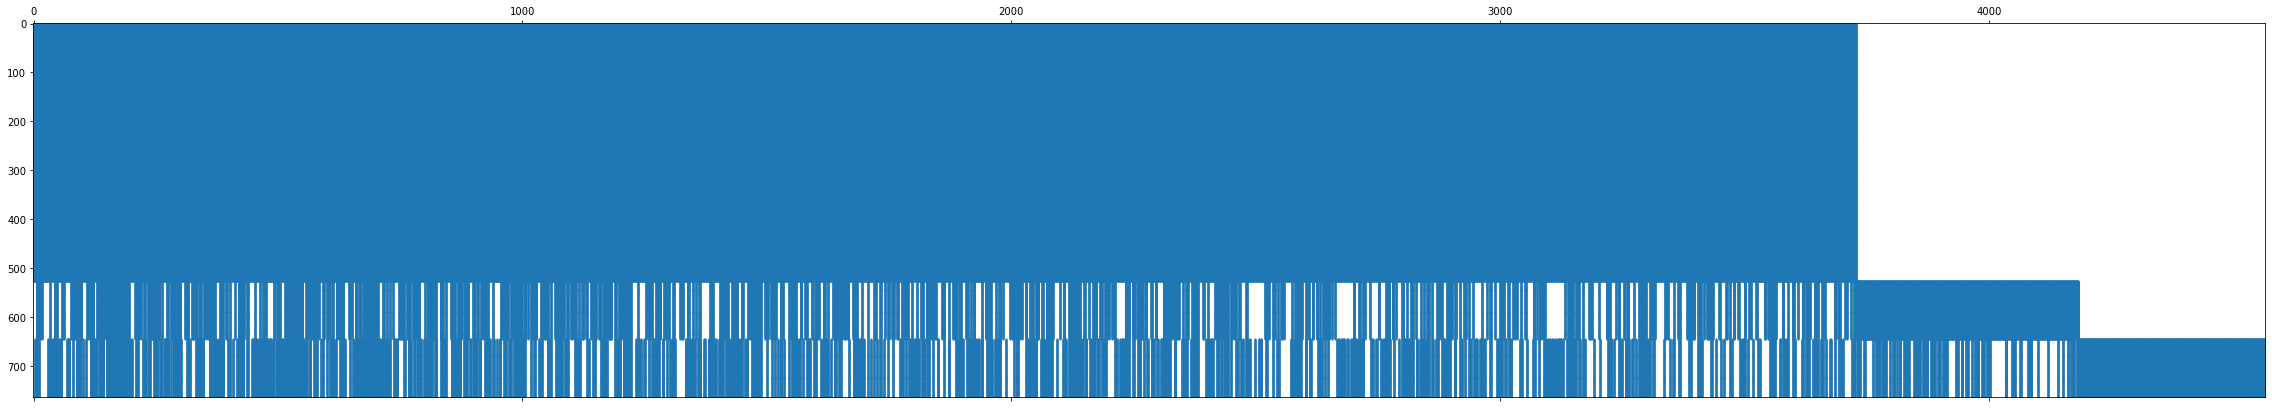

In [280]:
fig, ax1 = plt.subplots(figsize=(40,500))
plt.spy(combined_data, markersize=1)



### PCA visualisation

In [281]:
labels = [x.split("_", 1)[1] for x in combined_data.index]


<AxesSubplot:xlabel='PC0', ylabel='PC1'>

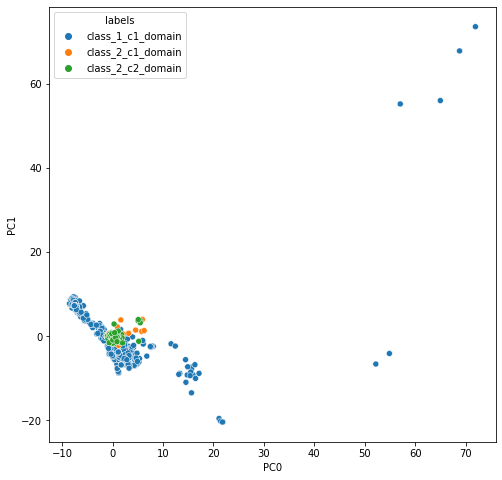

In [300]:
pca = PCA(n_components=10)
pc_data = pca.fit_transform(combined_data)

principle_df = pd.DataFrame(data = pc_data, columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9'])
principle_df['labels'] = labels

plt.figure(figsize=(8,8))
sns.scatterplot(data = principle_df , x = 'PC0',y = 'PC1', hue='labels')


### Clustering 

In [260]:
distmat = np.zeros((combined_data.shape[0], combined_data.shape[0]))
distmat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [283]:
filtered_data = combined_data.loc[:, combined_data.columns != 'labels']

import time 

start_time = time.time()
for i in range(combined_data.shape[0]):
    for j in range(i+1, combined_data.shape[0]):
        data = filtered_data.iloc[i].subtract(filtered_data.iloc[j])
        data = np.sqrt(sum(data**2))
        distmat[i,j] = distmat[j,i] = data
        
print(time.time() - start_time)

158.32474899291992


In [284]:
euc_dist = pd.DataFrame(distmat,index=combined_data.index, columns=combined_data.index)



In [285]:
euc_dist

,P06168_class_1_c1_domain,P38674_class_1_c1_domain,Q64BR7_class_1_c1_domain,Q57179_class_1_c1_domain,Q8FPX1_class_1_c1_domain,A4QDN4_class_1_c1_domain,A8ZTR0_class_1_c1_domain,B1VG26_class_1_c1_domain,P97115_class_1_c1_domain,Q03UU4_class_1_c1_domain,...,Q8E9D5_class_2_c2_domain,Q47UP4_class_2_c2_domain,Q8DDC8_class_2_c2_domain,O51888_class_2_c2_domain,B4S1X4_class_2_c2_domain,Q9AQ99_class_2_c2_domain,Q9AQA0_class_2_c2_domain,Q9AQ96_class_2_c2_domain,Q9AQ97_class_2_c2_domain,Q7VRM0_class_2_c2_domain
P06168_class_1_c1_domain,0.000000,154.630934,181.544866,152.670343,151.421757,152.670343,186.431827,154.727233,170.553176,170.553176,...,154.251610,156.831403,143.493395,158.635942,155.561492,146.941233,146.469735,147.524709,147.410429,159.281224
P38674_class_1_c1_domain,154.630934,0.000000,184.047984,154.743743,153.478310,154.743743,189.438437,156.624917,171.097548,171.097548,...,155.908353,159.769205,146.342783,161.012703,157.627484,149.327800,148.845274,149.940911,149.158756,160.939818
Q64BR7_class_1_c1_domain,181.544866,184.047984,0.000000,128.623881,127.129456,128.623881,190.540493,130.349846,148.693515,148.693515,...,130.356847,134.948642,118.551826,136.984143,129.952878,123.248641,122.652679,124.013494,123.321775,134.808268
Q57179_class_1_c1_domain,152.670343,154.743743,128.623881,0.000000,56.327328,0.000000,162.651200,70.021096,111.513440,111.513440,...,83.628281,90.409820,63.710867,94.480753,86.119175,71.099217,70.079366,72.379584,72.024779,92.237594
Q8FPX1_class_1_c1_domain,151.421757,153.478310,127.129456,56.327328,0.000000,56.327328,161.447758,72.133539,109.750686,109.750686,...,81.214150,87.975936,60.699024,92.479268,83.874662,68.243295,67.180104,69.576238,68.613500,90.140409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9AQ99_class_2_c2_domain,146.941233,149.327800,123.248641,71.099217,68.243295,71.099217,158.281782,74.790749,102.526397,102.526397,...,72.963607,82.067896,50.820642,82.780269,76.209776,0.000000,24.948733,38.145652,36.643931,82.318200
Q9AQA0_class_2_c2_domain,146.469735,148.845274,122.652679,70.079366,67.180104,70.079366,157.815614,73.819259,102.570779,102.570779,...,71.965900,81.158814,49.380142,81.444321,75.234242,24.948733,0.000000,35.632180,32.040332,81.433351
Q9AQ96_class_2_c2_domain,147.524709,149.940911,124.013494,72.379584,69.576238,72.379584,158.883426,76.014398,104.510246,104.510246,...,74.149301,83.180420,52.213233,83.471825,77.273676,38.145652,35.632180,0.000000,40.316301,82.878350
Q9AQ97_class_2_c2_domain,147.410429,149.158756,123.321775,72.024779,68.613500,72.024779,158.111311,75.668581,101.878672,101.878672,...,74.078225,82.255671,51.563437,82.609285,76.873058,36.643931,32.040332,40.316301,0.000000,82.335755


/home/seb-porras/miniconda3/envs/server/lib/python3.6/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/seb-porras/miniconda3/envs/server/lib/python3.6/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


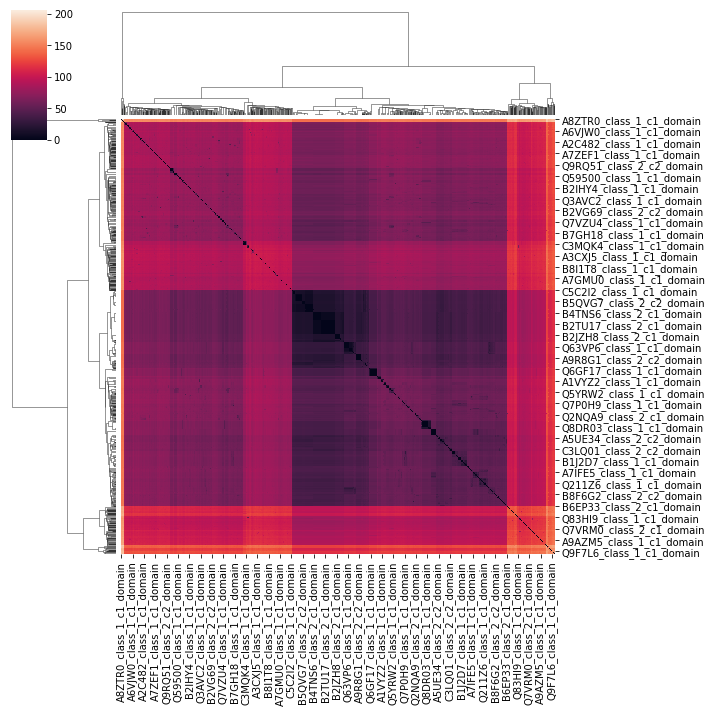

In [286]:
sns.clustermap(euc_dist)

### UMAP Visualisation 

In [306]:
import umap

AttributeError: module 'umap' has no attribute 'distances'